In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import math

In [2]:
img = cv2.imread("chess2.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
#img = cv2.GaussianBlur(img,(5,5),cv2.BORDER_DEFAULT)

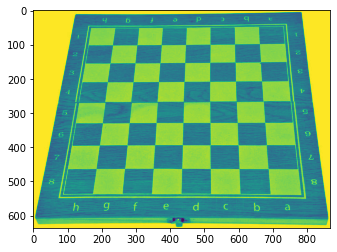

In [4]:
plt.imshow(img)


In [5]:
ret,thresh1 = cv2.threshold(img,250,255,cv2.THRESH_BINARY)
#FLOODFILL
mask = np

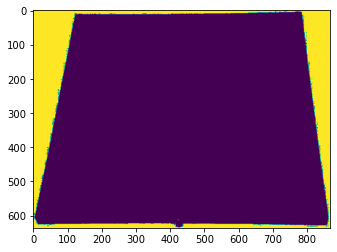

In [6]:
plt.imshow(thresh1)

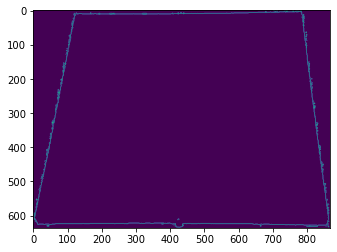

In [7]:
canny = cv2.Canny(thresh1, 200, 500)
plt.imshow(canny)

In [8]:
    cdst = cv2.cvtColor(canny, cv2.COLOR_GRAY2BGR)
    cdstP = np.copy(cdst)

    lines = cv2.HoughLines(canny, 1, np.pi/180, 150, None, 0, 0)
    if lines is not None:
        for i in range(0, len(lines)):
            rho = lines[i][0][0]
            theta = lines[i][0][1]
            a = math.cos(theta)
            b = math.sin(theta)
            x0 = a * rho
            y0 = b * rho
            pt1 = (int(x0 + 1000*(-b)), int(y0 + 1000*(a)))
            pt2 = (int(x0 - 1000*(-b)), int(y0 - 1000*(a)))
            cv2.line(cdst, pt1, pt2, (255,255,255), 3, cv2.LINE_AA)
            
    linesP = cv2.HoughLinesP(canny, 1, np.pi/50000, 500, None, 50, 10)
    
    if linesP is not None:
        for i in range(0, len(linesP)):
            l = linesP[i][0]
            cv2.line(cdstP, (l[0], l[1]), (l[2], l[3]), (0,0,255), 3, cv2.LINE_AA)

In [9]:
print(lines[0])


[[18.        1.553343]]


TypeError: int() argument must be a string, a bytes-like object or a number, not 'NoneType'

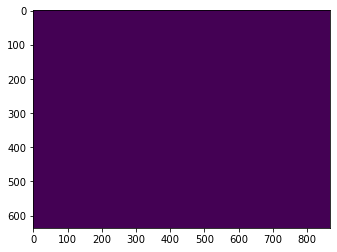

In [5]:

cdst = cv2.cvtColor(cdst, cv2.COLOR_BGR2GRAY)
plt.imshow(cdst)
corners = cv2.goodFeaturesToTrack(cdst, 4,0.8,1000)
corners = np.int0(corners)
print(corners)
for i in corners:
    x,y = i.ravel()
    cv2.circle(img,(x,y),3,1,-1)

In [11]:
mask = cv2.inRange(cdst, np.array([0,0,0]) , np.array([0,0,255]))
res = cv2.bitwise_and(cdst, cdst, mask = mask)

error: OpenCV(4.4.0) C:\Users\appveyor\AppData\Local\Temp\1\pip-req-build-zsozjuva\opencv\modules\core\src\arithm.cpp:1759: error: (-209:Sizes of input arguments do not match) The lower boundary is neither an array of the same size and same type as src, nor a scalar in function 'cv::inRange'


In [ ]:
def line_intersection(line1, line2):
    xdiff = (line1[0] - line1[1], line2[0] - line2[1])
    ydiff = (line1[0] - line1[1], line2[0] - line2[1])

    def det(a, b):
        return a[0] * b[1] - a[1] * b[0]

    div = det(xdiff, ydiff)

    d = (det(*line1), det(*line2))
    x = det(d, xdiff) / div
    y = det(d, ydiff) / div
    return x, y

In [ ]:
persp = cv2.getPerspectiveTransform(puntos1, puntos2)
dst = cb2.warpPerspective(img, persp, tamanoFinalImagen)
plt.imshow(dst)

In [3]:
    cdst = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)
    cdstP = np.copy(cdst)

    lines = cv2.HoughLines(img, 1, np.pi/180, 150, None, 0, 0)
    if lines is not None:
        for i in range(0, len(lines)):
            rho = lines[i][0][0]
            theta = lines[i][0][1]
            a = math.cos(theta)
            b = math.sin(theta)
            x0 = a * rho
            y0 = b * rho
            pt1 = (int(x0 + 1000*(-b)), int(y0 + 1000*(a)))
            pt2 = (int(x0 - 1000*(-b)), int(y0 - 1000*(a)))
            cv2.line(cdst, pt1, pt2, (255,255,255), 3, cv2.LINE_AA)

In [4]:
print(len(lines))

8767
